In [1]:
# notebook last tested with abtem version 1.0.0beta7

from abtem import __version__
print('current version:', __version__)

from abtem import *
from abtem.plot import show_atoms
from ase.io import read

current version: 1.0.0beta7


# Basic HRTEM simulation

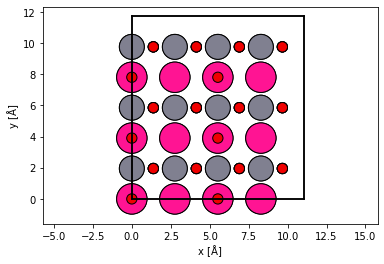

In [2]:
atoms = read('data/srtio3_110.cif')

atoms *= (1,1,1)

show_atoms(atoms)

In [3]:
potential = Potential(atoms, sampling=.08, slice_thickness=2, parametrization='kirkland', projection='finite')

In [12]:
# To simulate TDS uncomment below

#sigmas = {'Sr':.1, 'Ti':.1, 'O':.1} # standard deviations of thermal vibrations
#frozen_phonons = FrozenPhonons(atoms, num_configs=32, sigmas=sigmas)
#potential = Potential(frozen_phonons, sampling=.08, slice_thickness=2, parametrization='kirkland', projection='finite')

In [4]:
wave = PlaneWave(
    energy=300e3 # acceleration voltage in eV
)

exit_wave = wave.multislice(potential)

In [5]:
exit_wave.array.shape

(1, 139, 147)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x23402e61fd0>)

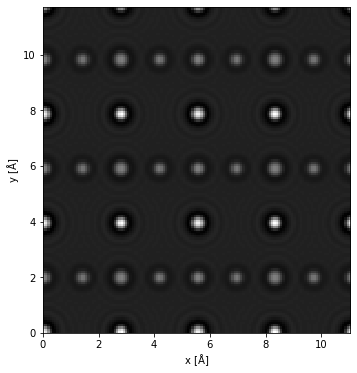

In [6]:
exit_wave.intensity().mean(0).show(figsize=(6,6))

<AxesSubplot:xlabel='alpha [mrad]', ylabel='Envelope'>

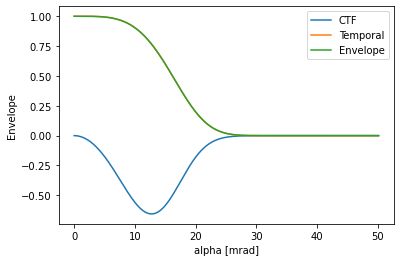

In [7]:
# See https://abtem.readthedocs.io/en/latest/walkthrough/05_contrast_transfer_function.html for parameter names

ctf = CTF(
    energy = wave.energy,
    semiangle_cutoff = 4500, # mrad
    focal_spread = 40, # Å
    defocus = -45.46, # Å
    Cs = -7e-6 * 1e10, # Å
)

ctf.show(50)

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x23401b23e20>)

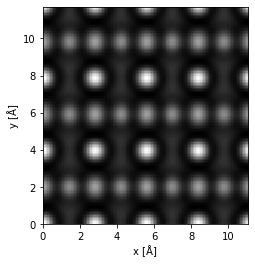

In [8]:
image_wave = exit_wave.apply_ctf(ctf)

image_wave.intensity().mean(0).show()

In [9]:
# get image intensity as array

image_wave.intensity().array[0]

array([[1.7317922, 1.7067424, 1.6352576, ..., 1.5274454, 1.6352562,
        1.706742 ],
       [1.7064878, 1.6820955, 1.6124824, ..., 1.5074937, 1.6124808,
        1.6820946],
       [1.6343807, 1.6118591, 1.5475838, ..., 1.4506507, 1.5475826,
        1.6118584],
       ...,
       [1.5259638, 1.506257 , 1.4500208, ..., 1.3652338, 1.4500198,
        1.5062563],
       [1.6343796, 1.6118573, 1.5475821, ..., 1.4506493, 1.5475813,
        1.6118566],
       [1.7064867, 1.6820939, 1.6124811, ..., 1.5074935, 1.6124803,
        1.6820931]], dtype=float32)

(<AxesSubplot:xlabel='alpha_x [mrad]', ylabel='alpha_y [mrad]'>,
 <matplotlib.image.AxesImage at 0x23401a92d00>)

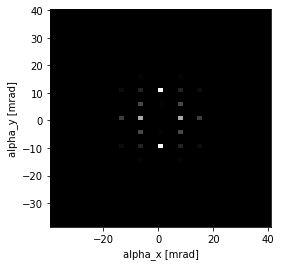

In [10]:
image_wave.diffraction_pattern(max_angle=40, block_zeroth_order=True).show()

(<AxesSubplot:xlabel='x [Å]', ylabel='y [Å]'>,
 <matplotlib.image.AxesImage at 0x2340197d280>)

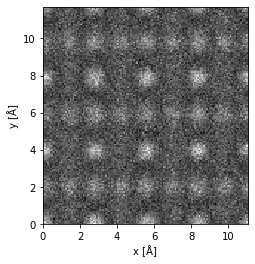

In [11]:
from abtem.noise import poisson_noise

measurement = image_wave.intensity()
noisy_measurement = poisson_noise(measurement, 5000)

noisy_measurement.show()